**Nallely Lizbeth Serna Rivera - A00833111**

Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)

In [1]:
#Importo las librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer los datos desde el archivo CSV
# 'np.genfromtxt' carga datos desde un archivo CSV, separando las columnas por comas
# 'skip_header=1' omite la primera fila, que contiene los encabezados
data = np.genfromtxt('Valhalla23 (1).csv', delimiter=',', skip_header=1)

In [3]:
# Separar las columnas en variables X (Celsius) e y (Valks)
# La primera columna es la temperatura en Celsius (X), la segunda es la temperatura en Valks (y)
X = data[:, 0]  # X es un vector con las temperaturas en Celsius
y = data[:, 1]  # y es un vector con las temperaturas en Valks

In [4]:
# Dividir manualmente los datos en conjunto de entrenamiento (80%) y prueba (20%)
# 'split_ratio' define la proporción de datos que se utilizarán para el entrenamiento
split_ratio = 0.8
split_index = int(split_ratio * len(X))  # Índice para dividir los datos

# Dividir X e y en subconjuntos de entrenamiento y prueba
X_train = X[:split_index]  # Datos de entrenamiento (80%)
y_train = y[:split_index]  # Etiquetas de entrenamiento (80%)
X_test = X[split_index:]   # Datos de prueba (20%)
y_test = y[split_index:]   # Etiquetas de prueba (20%)

In [5]:
# Redimensionar los datos para el cálculo de gradiente
# Necesitamos convertir los vectores X e y en matrices columna para que las operaciones matriciales funcionen correctamente
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [6]:
# Normalización de los datos
# Es importante normalizar los datos para que la escala de los valores no afecte el entrenamiento
X_mean = np.mean(X_train)  # Media de X_train
X_std = np.std(X_train)    # Desviación estándar de X_train
X_train = (X_train - X_mean) / X_std  # Normalizar X_train
X_test = (X_test - X_mean) / X_std    # Normalizar X_test usando la media y desviación estándar de X_train


In [7]:
# Función para calcular la predicción de y dado un conjunto de X y parámetros theta
def predict(X, theta):
    # Multiplica X por theta para obtener las predicciones
    return np.dot(X, theta)

# Función de costo (Error cuadrático medio)
def compute_cost(X, y, theta):
    m = len(y)  # Número de ejemplos
    predictions = predict(X, theta)  # Predicciones del modelo
    # Cálculo del costo usando el error cuadrático medio
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Función de gradiente descendente
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Número de ejemplos
    cost_history = []  # Lista para almacenar la historia del costo en cada iteración

    for i in range(num_iters):
        # Calcula el gradiente de la función de costo respecto a los parámetros theta
        gradients = (1 / m) * np.dot(X.T, (predict(X, theta) - y))
        # Actualiza los parámetros theta usando la tasa de aprendizaje (alpha)
        theta = theta - alpha * gradients
        # Calcula el costo con los nuevos parámetros y lo guarda en la historia
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Añadir una columna de 1's a X para el término independiente (intercept)
# Esto permite que el modelo aprenda tanto la pendiente como el intercepto
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Añadir x0 = 1 a cada instancia

# Inicializar los parámetros theta
theta = np.zeros((2, 1))  # Inicializa theta con ceros (para intercepto y pendiente)

# Definir los hiperparámetros
alpha = 0.001  # Tasa de aprendizaje: define qué tan grande es cada paso en la dirección del gradiente
num_iters = 5000  # Número de iteraciones: cuántas veces se actualizarán los parámetros


# Motivo de la elección de la tasa de aprendizaje:
# Se seleccionó una tasa de aprendizaje pequeña (0.001) para asegurar una convergencia estable del modelo.
# Si se elige una tasa demasiado alta, existe el riesgo de que el algoritmo de gradiente descendente
# sobrepase el mínimo de la función de costo y no converja adecuadamente.

# Ejecutar el gradiente descendente
theta_final, cost_history = gradient_descent(X_b, y_train, theta, alpha, num_iters)

# Imprimir los parámetros finales después del entrenamiento
print("Theta final:", theta_final)

Theta final: [[-49.49805193]
 [-87.91626009]]


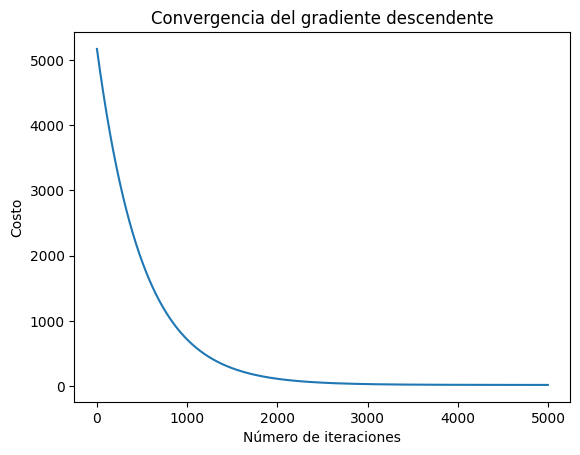

Costo en el conjunto de entrenamiento: 20.549347357832023
Costo en el conjunto de prueba: 33.92628511428473


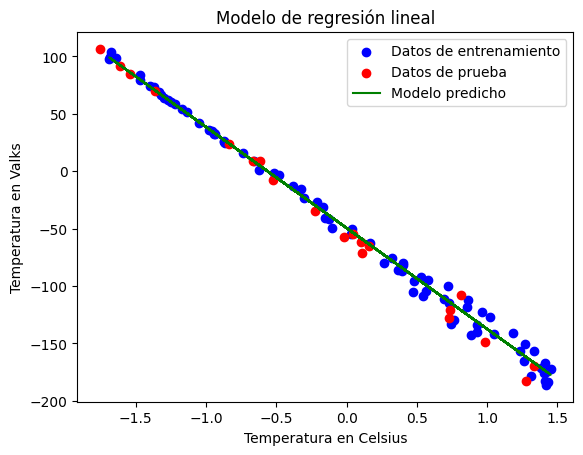

In [8]:
# Graficar la función de costo para ver la convergencia
plt.plot(range(num_iters), cost_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Convergencia del gradiente descendente")
plt.show()

# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = predict(X_b, theta_final)  # Predicciones para el conjunto de entrenamiento
train_cost = compute_cost(X_b, y_train, theta_final)  # Cálculo del costo en el conjunto de entrenamiento
print("Costo en el conjunto de entrenamiento:", train_cost)

# Evaluar el modelo en el conjunto de prueba
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Añadir x0 = 1 a cada instancia en X_test
y_test_pred = predict(X_test_b, theta_final)  # Predicciones para el conjunto de prueba
test_cost = compute_cost(X_test_b, y_test, theta_final)  # Cálculo del costo en el conjunto de prueba
print("Costo en el conjunto de prueba:", test_cost)

# Graficar los resultados
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(X_train, y_train_pred, color='green', label='Modelo predicho')
plt.xlabel("Temperatura en Celsius")
plt.ylabel("Temperatura en Valks")
plt.legend()
plt.title("Modelo de regresión lineal")
plt.show()